<a href="https://colab.research.google.com/github/git933/python_study-pm7-10/blob/main/homework_HSV_space_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using lena.png in google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


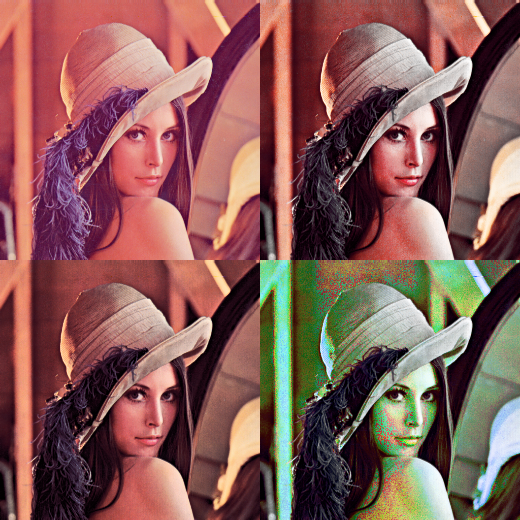

In [6]:
import cv2
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

path = "/content/drive/MyDrive/ComputerVision_class/Lena.png"

# 입력 받은 이미지를 불러온 후 출력
src = cv2.imread(path)

# 사이즈 조절
src = cv2.resize(src, (260, 260))

# hsv 컬러 형태로 변형
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# h, s, v로 컬러 영상 분리
h, s, v = cv2.split(hsv)


# v값 히스토그램 평탄화
equalizedV = cv2.equalizeHist(v)

# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 생성
hsv2 = cv2.merge([h,s,equalizedV])

# hsv2를 다시 BGR 형태로 변경
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
# 사이즈 조절
hsvDst = cv2.resize(hsvDst, (260, 260))


# s값 히스토그램 평탄화
equalizedS = cv2.equalizeHist(s)

# h,equalizedS,equalizedV를 합쳐서 새로운 hsv 이미지를 생성
hsv3 = cv2.merge([h,equalizedS,equalizedV])

# 마지막으로 hsv3를 다시 BGR 형태로 변경
hsvDst1 = cv2.cvtColor(hsv3, cv2.COLOR_HSV2BGR)
# 사이즈 조절
hsvDst1 = cv2.resize(hsvDst1, (260, 260))



# h값 히스토그램 평탄화
equalizedH = cv2.equalizeHist(h)

# equalizedH,equalizedS,equalizedV를 합쳐서 새로운 hsv 이미지 생성
hsv4 = cv2.merge([equalizedH,equalizedS,equalizedV])

# 마지막으로 hsv4를 다시 BGR 형태로 변경
hsvDst2 = cv2.cvtColor(hsv4, cv2.COLOR_HSV2BGR)
# 사이즈 조절
hsvDst2 = cv2.resize(hsvDst2, (260, 260))


add = cv2.hconcat([cv2.vconcat([src, hsvDst]), cv2.vconcat([hsvDst1, hsvDst2])])
cv2_imshow(add)


cv2.waitKey()
cv2.destroyAllWindows()